In [1]:
import pandas as pd
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 200)
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
import pandas
from pathlib import Path
from statsmodels.formula.api import ols
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [2]:
df_train = pd.read_csv('../csv/df_train.csv', index_col = 'id')

In [3]:
df_train.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,1_bedroom,2_bedrooms,3_bedrooms,4_bedrooms,5_bedrooms,6_bedrooms,7_bedrooms,8_bedrooms,9_bedrooms,10_bedrooms,11_bedrooms,1_bathroom,2_bathrooms,3_bathrooms,4_bathrooms,5_bathrooms,6_bathrooms,7_bathrooms,8_bathrooms,1_floor,1.5_floors,2_floors,2.5_floors,3_floors,3.5_floors,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199,has_basement,bed_bath_ratio,yard_space,low_grade,below_average_grade,average_grade,above_average_grade,high_Grade,0_view,1_view,2_view,3_view,4_view,1_condition,2_condition,3_condition,4_condition,5_condition
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2591820310,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,1986,98058,47.4388,-122.162,2390,7700,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.78,7858.0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
7974200820,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,1977,98115,47.6784,-122.285,2370,6283,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.67,3830.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
7701450110,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,1997,98006,47.5646,-122.129,3710,9685,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.60,9008.0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
9522300010,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,1990,98034,47.6995,-122.228,4050,14226,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.86,12328.0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
9510861140,2014-07-14,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,2004,98052,47.6647,-122.083,2250,4050,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.20,4101.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [4]:
df_train.shape

(17290, 133)

# Feature selection

In [5]:
# Drop columns that have dummy columns
df_features = df_train.drop(['date', 'price', 'bedrooms', 'bathrooms', 'zipcode', 'grade', 'floors', 
                           'view', 'condition', '4_bedrooms', '4_bathrooms', '2_floors', '98058', 'average_grade', '2_view', '4_condition'], axis=1)

In [6]:
# Set target variable
target = df_train['price']

In [7]:
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(df_features, target)

#access output
print(lm.intercept_)
print(lm.coef_)
print("R^2: ", lm.score(df_features, target))

-40245329.07741234
[ 1.52496461e+02 -7.93045541e+01  5.84838751e+05  9.18151384e+01
  6.06812717e+01 -8.57388973e+02  1.15816050e+03  2.77260822e+05
 -2.16624175e+05  3.79079843e+01 -1.21928071e-01 -2.02541746e+04
  5.43787299e+03  1.73958097e+04 -1.39785207e+04 -4.67466365e+04
 -2.35110981e+05 -6.74351860e+03 -6.75482667e+05 -4.72931485e+05
 -9.53696442e+04 -8.87406713e-07 -2.72706709e+04 -2.36525905e+04
  1.29414859e+05  5.94114100e+05  6.43833965e+05  1.66547023e+06
  1.06934919e+05  5.18006080e+04  9.42650939e+04 -6.02089430e+04
  6.34984754e+04 -2.97762024e+04 -1.29418181e+04 -3.95062312e+04
  7.10460525e+05  2.46677624e+05  2.07907874e+05  1.87452617e+05
  1.91179005e+05  7.58835195e+04  6.80838446e+03  5.78417784e+04
  4.55055477e+03  4.83561764e+04 -7.57994282e+04  1.32342571e+05
  1.36808229e+05 -9.83163059e+03  1.92121687e+05 -2.12843631e+04
 -2.29443783e+04 -3.34487378e+04  2.54468900e+05  8.05218765e+04
  3.65066878e+04  1.15155497e+06  4.21756538e+05 -6.80497311e+03
  1.33

## Create Train and Test Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=6,test_size=0.2)

In [9]:
#check the shape of the results
print("Training set - features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - features: ", X_test.shape, "Target: ",y_test.shape)

Training set - features:  (13832, 117) Target:  (13832,)
Training set - features:  (3458, 117) Target:  (3458,)


## How well did the model perform

In [10]:
print ("R^2 Score:", lm.score(X_train, y_train))

R^2 Score: 0.8240244865768074


In [11]:
# predict on the training data
y_train_pred = lm.predict(X_train)

In [12]:
y_train_pred

array([ 932973.02837278,  356771.57948827,  297336.52391002, ...,
        381570.39584931,  628303.91196794, 2168308.8183426 ])

In [13]:
#import the metrics module from sklearn
from sklearn import metrics

train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 91763.09351616666
Mean Squared Error: 24682646260.364418
Root Mean Squared Error: 157107.11715375728


# Predicting the Test set

In [14]:
#predict on the test set of data
y_pred = lm.predict(X_test)

In [15]:
y_pred

array([427444.74391984, 706170.69279166, 436070.86166415, ...,
       949538.3237962 , 267488.86850443, 686559.32830743])

In [16]:
print ("Score:", lm.score(X_test, y_test))

Score: 0.8214384971379827


In [17]:
test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))


print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error:92566.33612018937
Mean Squared Error:24233252436.365185
Root Mean Squared Error:155670.33255044193


### Comparing our Model's performance on training data versus test data

In [18]:
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Training:  157107 vs. Testing:  155670


### Check the assumptions of linear regression

In [19]:
#create a data array of our errors/residuals
residuals = (y_test- y_pred)

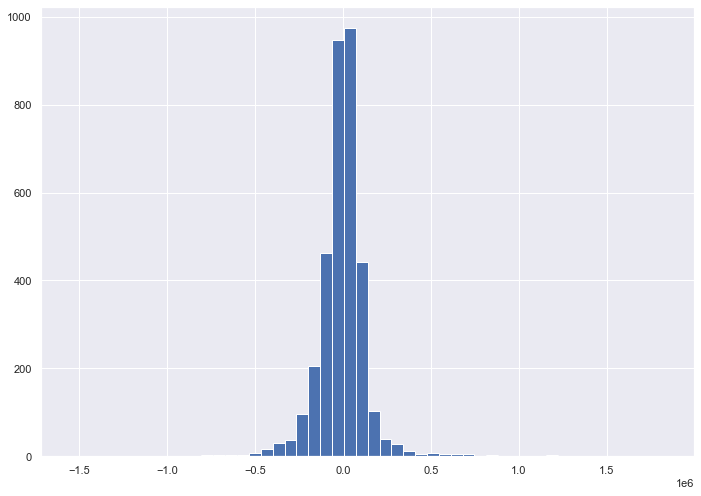

In [20]:
sns.set_theme(style="darkgrid")
residuals.hist(bins=50, figsize=(11.7,8.27))
plt.show()

<AxesSubplot:xlabel='price', ylabel='price'>

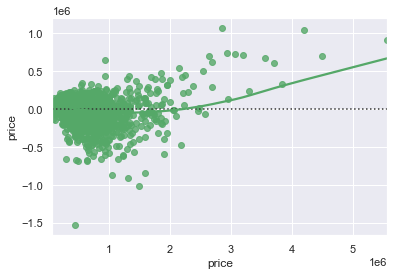

In [21]:
sns.residplot(y_test, residuals, lowess=True, color="g")

# Final Model

In [22]:
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Training:  157107 vs. Testing:  155670


In [23]:
#instantiate a linear regression object
lm_final = LinearRegression()

#fit the linear regression to the data
lm_final = lm_final.fit(df_features, target)

In [24]:
lm_final.coef_

array([ 1.52496461e+02, -7.93045541e+01,  5.84838751e+05,  9.18151384e+01,
        6.06812717e+01, -8.57388973e+02,  1.15816050e+03,  2.77260822e+05,
       -2.16624175e+05,  3.79079843e+01, -1.21928071e-01, -2.02541746e+04,
        5.43787299e+03,  1.73958097e+04, -1.39785207e+04, -4.67466365e+04,
       -2.35110981e+05, -6.74351860e+03, -6.75482667e+05, -4.72931485e+05,
       -9.53696442e+04, -8.87406713e-07, -2.72706709e+04, -2.36525905e+04,
        1.29414859e+05,  5.94114100e+05,  6.43833965e+05,  1.66547023e+06,
        1.06934919e+05,  5.18006080e+04,  9.42650939e+04, -6.02089430e+04,
        6.34984754e+04, -2.97762024e+04, -1.29418181e+04, -3.95062312e+04,
        7.10460525e+05,  2.46677624e+05,  2.07907874e+05,  1.87452617e+05,
        1.91179005e+05,  7.58835195e+04,  6.80838446e+03,  5.78417784e+04,
        4.55055477e+03,  4.83561764e+04, -7.57994282e+04,  1.32342571e+05,
        1.36808229e+05, -9.83163059e+03,  1.92121687e+05, -2.12843631e+04,
       -2.29443783e+04, -

# Save your final model using pickle.

In [25]:
import pickle


pickle_out = open("model.pickle","wb")
pickle.dump(lm_final, pickle_out)
pickle_out.close()

In [26]:
other_info = [df_features]

In [27]:
pickle_out = open('other_info.pickle', "wb")
pickle.dump(other_info, pickle_out)
pickle_out.close()